**This note will be completed**

In this excercise I will apply different **classification** algorithms to the Iris data.
The dataset includes 4 dimensions related to Iris flowers and I am going to apply classification methods, including the followings:

* Decision Tree
* Random Forest
* Logistic regression
* SVM
* KNN
* GNB

I review advantages and disadvantages of each method. As the dataset has no outlier or Nan values, I will **not do any data cleaning** on that and just do a standard **normalization**. 
Since data includes only 150 datasets, for the cross validation we use **k-fold cross validation**. At the end we do a **hyper parameter tuning** by applying a **grid search**.
This practice includes many **data visualization**.

# Overview:
### 0) Data information
### 1) Data visualization
### 2) Data Cleaning
### 3) Training models
### 4) k-fold cross validation
### 5) Hypertuning parameters


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

### 0) data information

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
print('The first 3 data are')

dataset.head(3)

The first 3 data are


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
print('Data statistics')
dataset.describe()

Data statistics


,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
print('Making a new data set and put the class objects into numbers')
data=dataset
data['class'] = pd.Categorical(data['class'])
data['class'] = data['class'].cat.codes
data.head(3)

Making a new data set and put the class objects into numbers


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 1) Data visualization


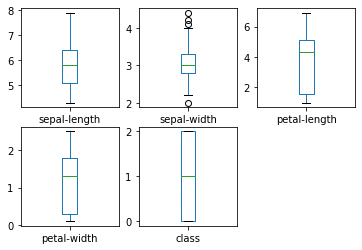

In [6]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

These plots show the mean values for each feature (Green line)
std: the box
min-max (not exactly, it should be something else) the - line outsede the box
Outliers: o ???

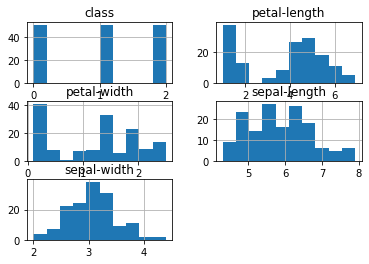

In [7]:
# histograms
dataset.hist()
plt.show()

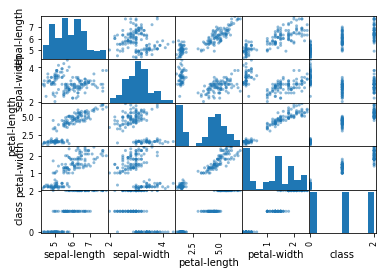

In [8]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

The above two sets of plots show how scatter are our data and they are distributed over different values. But still they do not show how they are connected to our target.

In [9]:
array=data.values
X=array[:,0:4]
y=array[:,4]

In [10]:
def s_plot(x1,x2, l1 , l2, x1min,x1max,x2min,x2max):
    plt.clf()
    plt.scatter(x1,x2, c=y, cmap=plt.cm.Set1,edgecolor='k')
    plt.xlabel(l1)
    plt.ylabel(l2)
    plt.xlim(x1min, x1max)
    plt.ylim(x2min, x2max)
    plt.xticks(())
    plt.yticks(())



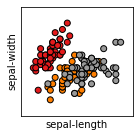

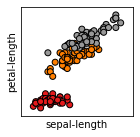

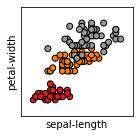

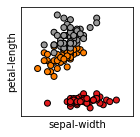

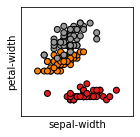

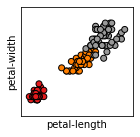

In [11]:
s=0
for i in range(0,3):
    for j in range(i+1,4):
        s+=1 
        #plt.subplot(3,2,s)
        plt.figure(s, figsize=(2, 2))
        s_plot(X[:,i], X[:,j], data.columns[i] , data.columns[j], X[:,i].min()-0.5 , X[:,i].max() +0.5, X[:,j].min()-0.5 , X[:,j].max()+0.5)


The above plots show the red class is completely separated and distinguishable in all plots. However the gray and orrange ones are more mixed. The best features separates them are petal width and length.
However, we use all features in our training.


Finally, We look into the **correlation** functions between different features and the target

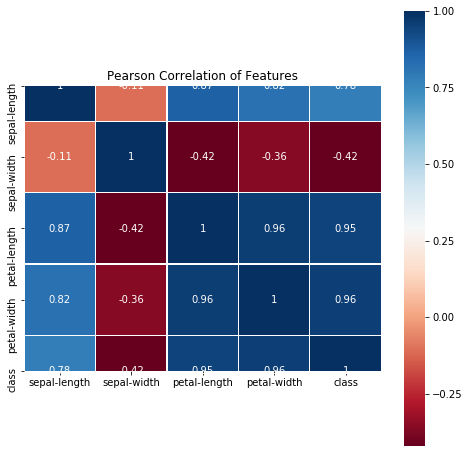

In [12]:
colormap = plt.cm.RdBu
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features', y=1, size=12)
sns.heatmap(data.corr(),linewidths=0.2,vmax=1, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### 2) Data Cleaning
The data includes no missing values or bad outlier. All features are numerical and hence the data is already clean.

### 3) Training models
In this part I am going to apply the following trainings method to the dataset and describe them:

* Logistic regression
* Decision Tree
* Random Forest
* SVM
* KNN
* GNB

#### a) Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, C=0.5, class_weight='balanced', solver='liblinear', max_iter=100).fit(X, y)
clf.score(X, y)

0.9666666666666667

C= inverse of regularization parameter. i.e. smaller: stronger regularization. default :1

class_weight: None (default) balanced ,

solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

‘liblinear’ and ‘saga’ also handle L1 penalty

‘saga’ also supports ‘elasticnet’ penalty

‘liblinear’ does not support setting penalty='none'

max_iter=100 default

* What is the model
* Advantagous and disadvantagous of model:
* Different options of the model
* What is the score? Return the mean accuracy on the given test data and labels. Which here means we have applied it to the same set we already trained our data. Which is not good.


#### b) decision Tree

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=5, min_samples_split=5).fit(X, y)
clf.score(X, y)


0.9733333333333334

**SomeTips**

* Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.

* Consider performing dimensionality reduction (**PCA, ICA, or Feature selection**) beforehand to give your tree a better chance of finding features that are discriminative.

* Understanding the **decision tree structure** will help in gaining more insights about how the decision tree makes predictions, which is important for understanding the important features in the data.

* Visualise your tree as you are training by using the export function. Use **max_depth=3** as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.

* Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use max_depth to control the size of the tree to **prevent overfitting**.

* Use min_samples_split or **min_samples_leaf** to ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered. A very **small number will usually mean the tree will overfit**, whereas a large number will prevent the tree from learning the data. Try **min_samples_leaf=5** as an initial value. If the sample size varies greatly, a float number can be used as percentage in these two parameters. While **min_samples_split** can create arbitrarily small leaves, min_samples_leaf guarantees that each leaf has a minimum size, avoiding low-variance, over-fit leaf nodes in regression problems. For classification with few classes, min_samples_leaf=1 is often the best choice.

* Note that **min_samples_split** considers samples directly and independent of sample_weight, if provided (e.g. a node with m weighted samples is still treated as having exactly m samples). Consider min_weight_fraction_leaf or min_impurity_decrease if accounting for sample weights is required at splits.

* Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value. Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf.

* If the samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion such as min_weight_fraction_leaf, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.

* All decision trees use np.float32 arrays internally. If training data is not in this format, a copy of the dataset will be made.

* If the input matrix X is very sparse, it is recommended to convert to sparse csc_matrix before calling fit and sparse csr_matrix before calling predict. Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.

#### c) Ensemble classifiers: Random Forest & Extra trees

In [15]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1, min_samples_split=2,  max_features=2).fit(X, y)
clf.score(X, y)



1.0

**description**
the RandomForest algorithm and the Extra-Trees method. Both algorithms are perturb-and-combine techniques [B1998] specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0).fit(X, y)
clf.score(X, y)


1.0

#### d) SVM

In [17]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X, y)
clf.score(X, y)



0.9933333333333333

Different Kernels: poly , rbf , linear
Other parameters: max_iter, gamma, C

#### e) KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors = 10 , weights='distance').fit(X, y)
clf.score(X, y)

1.0

#### f) GNB

In [19]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X, y)
clf.score(X, y)

0.96

#### 4) k-fold cross validation

It is the time to validate our models. The score function we used, use the same X,y that we train our model (in sample test) and do not give us correct information on how good is the model.

The best way to validate a model is to use cross-validation set separated by some formula like:



In [24]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((105, 4), (105,), (45, 4), (45,))

Lets now see the scores

In [27]:
clf = LogisticRegression(random_state=0, C=0.5, class_weight='balanced', solver='liblinear', max_iter=100).fit(X_train, y_train)
print('model: LR and score:', clf.score(X_valid, y_valid))

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=5, min_samples_split=5).fit(X_train, y_train)
print('model: DT and score:', clf.score(X_valid, y_valid))

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1, min_samples_split=2,  max_features=2).fit(X_train, y_train)
print('model: RF and score:', clf.score(X_valid, y_valid))

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('model: SVC and score:', clf.score(X_valid, y_valid))

clf = KNeighborsClassifier(n_neighbors = 10 , weights='distance').fit(X_train, y_train)
print('model: KNN and score:', clf.score(X_valid, y_valid))

clf = GaussianNB().fit(X_train, y_train)
print('model: GNB and score:', clf.score(X_valid, y_valid))


model: LR and score: 0.8666666666666667
model: DT and score: 0.9555555555555556
model: RF and score: 0.9555555555555556
model: SVC and score: 1.0
model: KNN and score: 0.9777777777777777
model: GNB and score: 0.9333333333333333


However, as the number of sample data is too low (150 in total), even with above code there exist two problems:
i) the training has been done on even fewer number of data, i.e. 105
ii) by changing the cross validation test the score change as we do not have enough statistical data.
To solve these issues for low number of data sets, we use k-fold cross validation

In the k-fold CV, the training set is split into k smaller sets. The following procedure is followed for each of the k “folds”:

* A model is trained using k-1 of the folds as training data;

* the resulting model is validated on the remaining part of the data 

The performance measure reported by k-fold cross-validation is then the **average** of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

In [31]:
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(random_state=0, C=0.5, class_weight='balanced', solver='liblinear', max_iter=100)
scores = cross_val_score(clf, X, y, cv=5)
print("LR: %0.3f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=5, min_samples_split=5)
scores = cross_val_score(clf, X, y, cv=5)
print("DT: %0.3f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1, min_samples_split=2,  max_features=2)
scores = cross_val_score(clf, X, y, cv=5)
print("RF: %0.3f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("SVC: %0.3f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf = KNeighborsClassifier(n_neighbors = 10 , weights='distance')
scores = cross_val_score(clf, X, y, cv=5)
print("KNN: %0.3f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf = GaussianNB()
scores = cross_val_score(clf, X, y, cv=5)
print("GNB: %0.3f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

LR: 0.947 accuracy with a standard deviation of 0.03
DT: 0.940 accuracy with a standard deviation of 0.06
RF: 0.967 accuracy with a standard deviation of 0.02
SVC: 0.980 accuracy with a standard deviation of 0.02
KNN: 0.987 accuracy with a standard deviation of 0.02
GNB: 0.953 accuracy with a standard deviation of 0.03


Instead of score we can use other metrics as well. For example, f1_score or recall

In [33]:
from sklearn import metrics
clf = KNeighborsClassifier(n_neighbors = 10 , weights='distance')
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print("KNN: f1 score macro is %0.3f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


KNN: f1 score macro is 0.987 with a standard deviation of 0.02


 In the case of the Iris dataset, the samples are balanced across target classes hence the accuracy and the F1-score are almost equal.

It is also possible to use other cross validation strategies by passing a cross validation iterator instead, for instance:

In [34]:
from sklearn.model_selection import ShuffleSplit
clf = KNeighborsClassifier(n_neighbors = 10 , weights='distance')
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clf, X, y, cv=cv, scoring='f1_macro')
print("KNN: f1 score macro is %0.3f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


KNN: f1 score macro is 0.963 with a standard deviation of 0.02


Or another method:

In [43]:
from sklearn.model_selection import StratifiedKFold


models = []
models.append(('LR', LogisticRegression(random_state=0, C=0.5, class_weight='balanced', solver='liblinear', max_iter=100)))
models.append(('DT', tree.DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=5, min_samples_split=5)))
models.append(('RF', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1, min_samples_split=2,  max_features=2)))
models.append(('SVM', svm.SVC(kernel='linear', C=1, random_state=42)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 10 , weights='distance')))
models.append(('GNB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.915455 (0.086153)
DT: 0.934545 (0.059168)
RF: 0.953636 (0.046435)
SVM: 0.980909 (0.038236)
KNN: 0.961818 (0.046851)
GNB: 0.935455 (0.058698)


##### Algorithm comparison

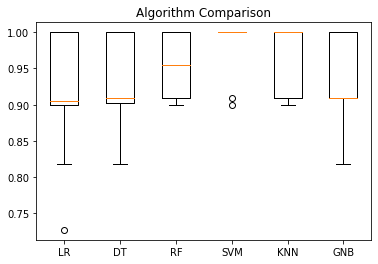

In [46]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

So we choose SVM for this problem

### 6) Hypertuning Parameters

Here, I use the Gridsearch to find the best parameters of the model that I chose in the last section

In [57]:
from sklearn.model_selection import GridSearchCV

#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, y)
#GridSearchCV(estimator=svc,param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_gamma',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [58]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.913 (+/-0.108) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.913 (+/-0.108) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.933 (+/-0.094) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.913 (+/-0.108) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.980 (+/-0.033) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.933 (+/-0.094) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.980 (+/-0.033) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.980 (+/-0.033) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.980 (+/-0.033) for {'C': 1, 'kernel': 'linear'}
0.973 (+/-0.078) for {'C': 10, 'kernel': 'linear'}
0.967 (+/-0.084) for {'C': 100, 'kernel': 'linear'}
0.967 (+/-0.084) for {'C': 1000, 'kernel': 'linear'}
